In [37]:
import cPickle as pickle
import h5py


from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

class FixedOrderFormatter(ScalarFormatter):
    """Formats axis ticks using scientific notation with a constant order of 
    magnitude"""
    def __init__(self, order_of_mag=0, useOffset=True, useMathText=False):
        self._order_of_mag = order_of_mag
        ScalarFormatter.__init__(self, useOffset=useOffset, 
                                 useMathText=useMathText)
    def _set_orderOfMagnitude(self, range):
        """Over-riding this to avoid having orderOfMagnitude reset elsewhere"""
        self.orderOfMagnitude = self._order_of_mag
        
        
        
        
def PlotModels(pathList, text,labels, ylim=None, mod=1, ylim_glob=None,):
    
    models = ['../new/Mod_A_2D_XCO_P8.hdf5',] + pathList
    h_base = h5py.File('../new/Mod_A_2D_XCO_P8.hdf5')
    
    fits = []
    ll, ll_no_dm = [], []
    llg1, llg2, llg3, llg4 = [],[],[],[]
    
    p7v6_LL_total = 2*(np.sum(pickle.load(open('../p7v6_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC/'].attrs['loglike_total'])
    p6v11_LL_total = 2*(np.sum(pickle.load(open('../p6v11_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC/'].attrs['loglike_total'])
    
    p7v6_LL_total_no_dm = 2*(np.sum(pickle.load(open('../p7v6_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    p6v11_LL_total_no_dm = 2*(np.sum(pickle.load(open('../p6v11_Analysis_loglike.pickle','rb')))-h_base['/fit_results/GC_no_dm/'].attrs['loglike_total'])
    
    for i, model in enumerate(models):        
        #try:
            print model
            h = h5py.File('../mod_c/'+model)
            
            fit = h['/fit_results/GC'].attrs
            fit_no_dm = h['/fit_results/GC_no_dm'].attrs
            #print 'log-like, TS:', models[i], np.sum(fit['loglike_total']), 2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total'])
            ll.append(-2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit['loglike_total']))
            ll_no_dm.append(-2*(h_base['/fit_results/GC/'].attrs['loglike_total']-fit_no_dm['loglike_total']))
            
            fit_global = h['/fit_results/global'].attrs
            llg1.append(-fit_global['localfval'])
            #print fit_global['localfval'], fit_global['outerfval'], fit_global['innerfval']
            llg2.append(-fit_global['outerfval'])
            llg3.append(-fit_global['innerfval'])
            llg4.append(llg1[-1]+llg2[-1]+llg3[-1])
            
            #print fit.keys()
            E, flux, stat = fit['energies'], fit['flux_DM'], fit['fluxunc_DM']
            
            plt.subplot(131)

            if i==0:
                plt.errorbar(E/1e3,E**2*flux/1e3,([E**2,E**2]*stat.T/1e3), 
                             label='Base 2D',capthick=1, capsize=2, ls=':' )
            elif i%mod==0:
                plt.errorbar(E/1e3,(E**2*flux/1e3), 
                             label=labels[i-1],capthick=1, capsize=2, ls='-' )

            plt.subplot(132)
            
#             #print h_base['/fit_results/GC/'].attrs.keys()
#             if i%mod==0:
#                 TS = 2*(h_base['/fit_results/GC/'].attrs['loglike']-fit['loglike'])
#                 plt.plot(E/1e3, TS)

#         except:
#             ll.append(-1e10)
#             ll_no_dm.append(-1e10)
#             llg1.append(-1e10)
#             llg2.append(-1e10)
#             llg3.append(-1e10)
#             llg4.append(-1e10)
#             print 'no results found for model ', model
    
    
    plt.subplot(132)
    plt.plot(range(len(labels)), ll[1:],marker='o',ls=':',color='firebrick', label='With DM')
    plt.plot(range(len(labels)), ll_no_dm[1:],marker='o',ls=':',color='steelblue',label='No DM')
    
    plt.subplot(131)
    plt.legend(frameon=False, fontsize=8)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel(r'$\rm{E^2\ dN/dE\ [GeV/cm^2/s/sr]}$')
    plt.xlabel(r'$\rm{E\ [GeV]}$')
    plt.ylim(5e-8,2e-6)
    plt.text(.05,.95, text, transform=plt.gca().transAxes, fontsize=8)
    
    
    plt.yscale('symlog', linthreshy=1e-7, subsy=np.arange(0,10),linscaley=0.1)
    plt.ylim(-1e-6,1e-5)
    
    
#     if 'spiral' in text:
#         plt.yscale('symlog')
#         plt.ylim(5e-7,2e-6)
    
#     plt.subplot(222)
#     plt.ylabel(r'$-2\Delta\ln{(\mathcal{L})}$')   
#     plt.xlabel(r'$\rm{E\ [GeV]}$')
#     plt.xscale('log')
#     plt.ylim(-50,200)
            
    plt.subplot(132)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim is not None:
        plt.ylim(ylim)
        
    
    
#     plt.hlines(p7v6_LL_total, -1, len(labels), color='firebrick')
#     plt.hlines(p6v11_LL_total, -1, len(labels), color='firebrick')
#     plt.hlines(p7v6_LL_total_no_dm, -1, len(labels), color='steelblue', linestyles='--')
#     plt.hlines(p6v11_LL_total_no_dm, -1, len(labels), color='steelblue', linestyles='--' )
#     plt.text(.05*(plt.xlim()[1]-plt.xlim()[0]), p6v11_LL_total-.06*(plt.ylim()[1]-plt.ylim()[0]),'P6V11', color='purple', fontsize=8)
#     plt.text(.05*(plt.xlim()[1]-plt.xlim()[0]), p7v6_LL_total-.06*(plt.ylim()[1]-plt.ylim()[0]),'P7V6', color='purple', fontsize=8)
#     plt.text(.05*(plt.xlim()[1]-plt.xlim()[0]), p6v11_LL_total_no_dm-.06*(plt.ylim()[1]-plt.ylim()[0]),'P6V11 No DM', color='purple', fontsize=8)
#     plt.text(.05*(plt.xlim()[1]-plt.xlim()[0]), p7v6_LL_total_no_dm-.06*(plt.ylim()[1]-plt.ylim()[0]),'P7V6 No DM', color='purple', fontsize=8)
               
    plt.ylabel(r'$\Delta\chi^2$')
    plt.legend(frameon=False, fontsize=8, loc=4)
    
    plt.subplot(133)
    plt.gca().yaxis.set_major_formatter(FixedOrderFormatter(4))
    # ------------------------------------------------
    # Global fitting plot
    # ------------------------------------------------
    plt.plot(range(len(labels)), -2*(llg1[1:]-llg1[0]),marker='o',ls=':', markersize=4, color='firebrick', label='Local')
    plt.plot(range(len(labels)), -2*(llg2[1:]-llg2[0]),marker='o',ls=':', markersize=4,color='steelblue', label='Outer')
    plt.plot(range(len(labels)), -2*(llg3[1:]-llg3[0]),marker='o',ls=':', markersize=4,color='goldenrod', label='Inner')
    plt.plot(range(len(labels)), -2*(llg4[1:]-llg4[0]),marker='o',ls=':', markersize=4,color='cyan', label='Total')
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.xlim(-.5, len(labels)-.5)
    if ylim_glob is not None:
        plt.ylim(ylim_glob)
    plt.ylabel(r'$\Delta\chi^2$')
    plt.legend(frameon=False, fontsize=8, loc=4, ncol=2)


#PlotModels(['../mod_c/mod_e_center_high_res.hdf5','../mod_c/mod_e_center_high_res_XCO.hdf5'], text='High-Res CR', labels=['HR','HR $X_{CO}$'])



../new/Mod_A_2D_XCO_P8.hdf5
mod_m_52_XCO_stripped.hdf5
mod_m_52_high_res_XCO_stripped.hdf5
mod_m_52_R30_XCO_stripped.hdf5
mod_m_52_high_time_res_XCO_stripped.hdf5


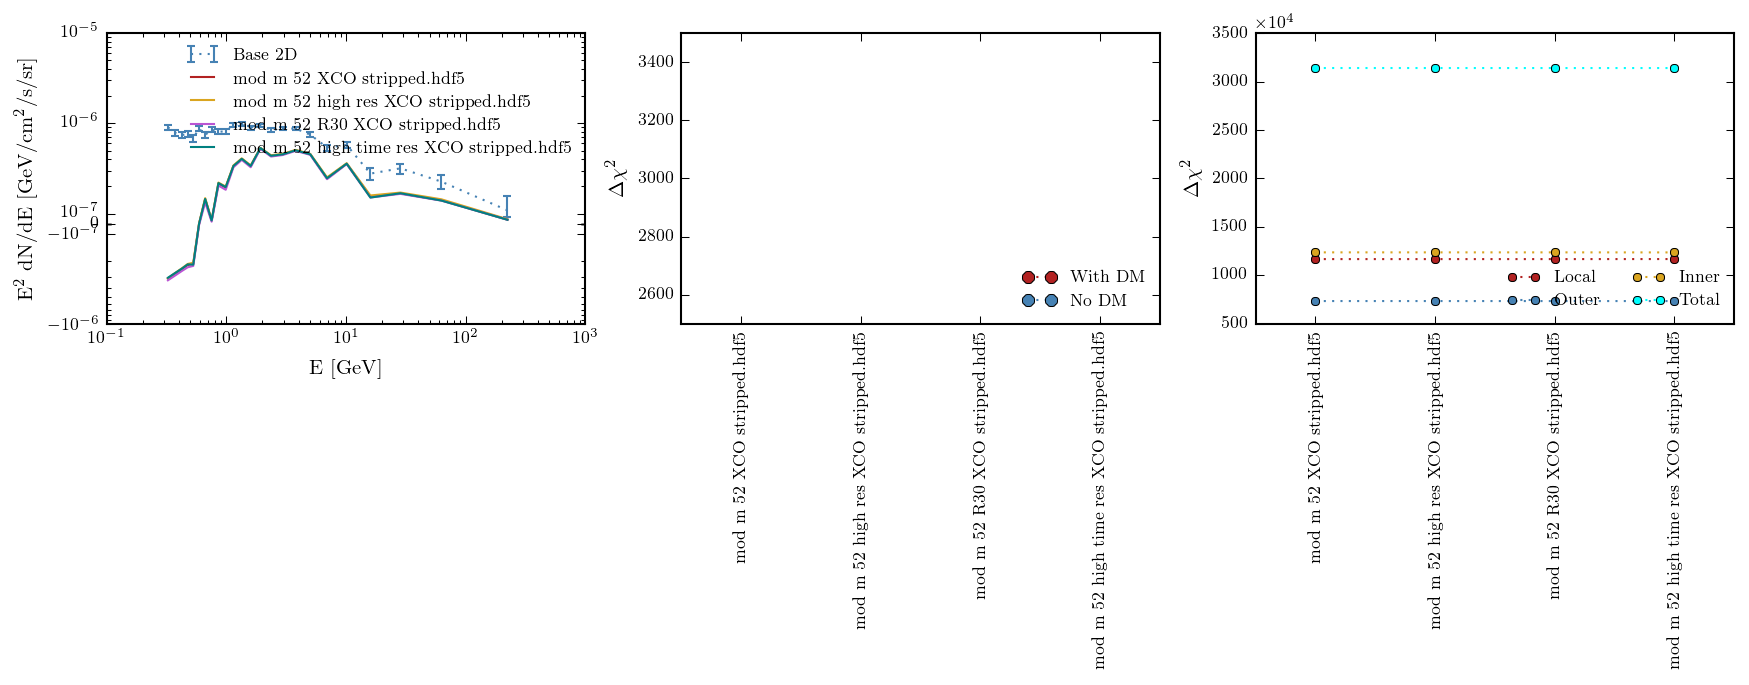

In [38]:
plt.figure(figsize=(14,2.5))
pathlist  = ['mod_m_52_XCO_stripped.hdf5','mod_m_52_high_res_XCO_stripped.hdf5', 'mod_m_52_R30_XCO_stripped.hdf5', 'mod_m_52_high_time_res_XCO_stripped.hdf5']
labels =  [ path.replace('_',' ') for path in pathlist]
PlotModels(pathList=pathlist, text='',labels=labels, ylim=(2500,3.5e3))


../new/Mod_A_2D_XCO_P8.hdf5
../mod_c/Mod_A_2D_z6_Yus_XCO_P8.hdf5
../mod_c/Mod_A_2D_MS04_D7_XCO_P8.hdf5
../mod_c/Mod_A_2D_XCO_P8_stripped.hdf5
../mod_c/Mod_A_2D_MS04_XCO_P8_stripped.hdf5
../mod_c/base1_change_B_JF_MS04_XCO_P8_stripped.hdf5


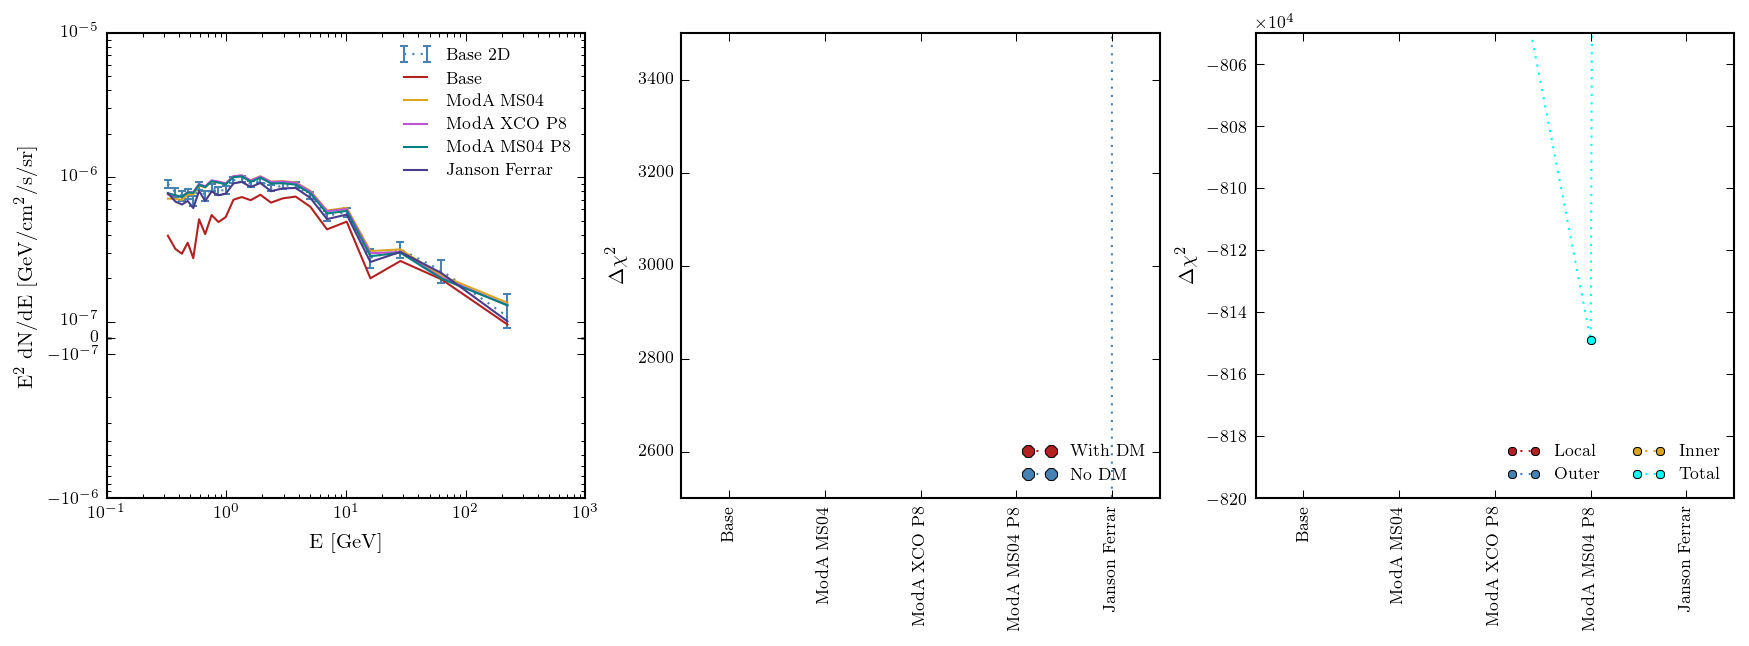

In [39]:
plt.figure(figsize=(14,4))
pathlist  = ['../mod_c/Mod_A_2D_z6_Yus_XCO_P8.hdf5','../mod_c/Mod_A_2D_MS04_D7_XCO_P8.hdf5','../mod_c/Mod_A_2D_XCO_P8_stripped.hdf5', '../mod_c/Mod_A_2D_MS04_XCO_P8_stripped.hdf5',
            '../mod_c/base1_change_B_JF_MS04_XCO_P8_stripped.hdf5']
labels =  [ 'Base', 'ModA MS04', 'ModA XCO P8','ModA MS04 P8', 'Janson Ferrar' ]
PlotModels(pathList=pathlist, text='',labels=labels, ylim=(2500,3.5e3),ylim_glob=[-.82e7,-.805e7])

# Galrop HI, galprop H2.   

../new/Mod_A_2D_XCO_P8.hdf5
../base1_change_XCO_B_GRID_XCO_P8_stripped.hdf5
../base1_change_B_XCO_P8_stripped.hdf5
../base1_change_B090005020_MS04_XCO_P8_stripped.hdf5
../base1_change_B090010020_MS04_XCO_P8_stripped.hdf5


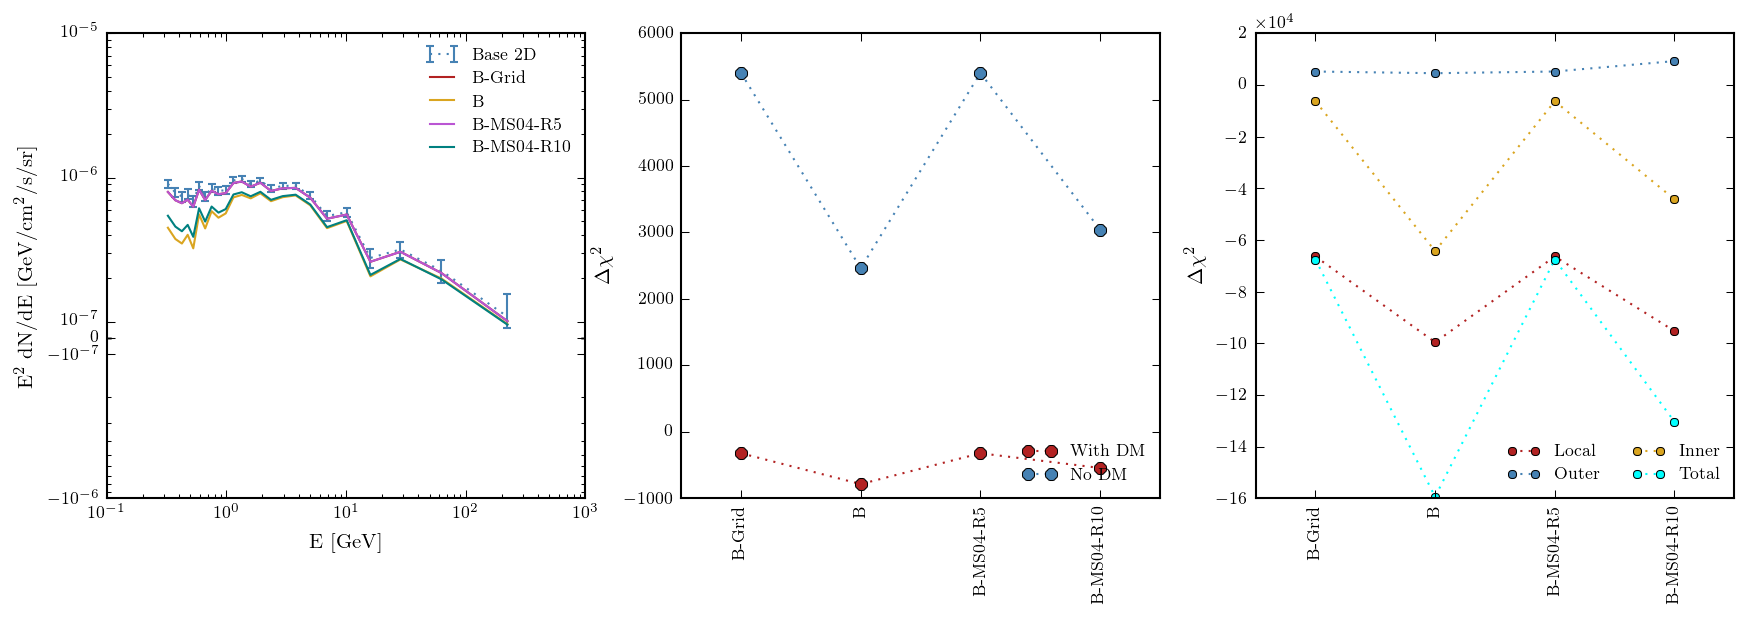

In [40]:
plt.figure(figsize=(14,4))
pathlist  = ['../base1_change_XCO_B_GRID_XCO_P8_stripped.hdf5','../base1_change_B_XCO_P8_stripped.hdf5','../base1_change_B090005020_MS04_XCO_P8_stripped.hdf5','../base1_change_B090010020_MS04_XCO_P8_stripped.hdf5']
labels =  [ 'B-Grid', 'B', 'B-MS04-R5','B-MS04-R10']
PlotModels(pathList=pathlist, text='',labels=labels, ylim=(None,None))

../new/Mod_A_2D_XCO_P8.hdf5
../new/iter1/mod_s_46_XCO_P8_stripped.hdf5
../new/mod_s_JF12_46_XCO_P8_stripped.hdf5


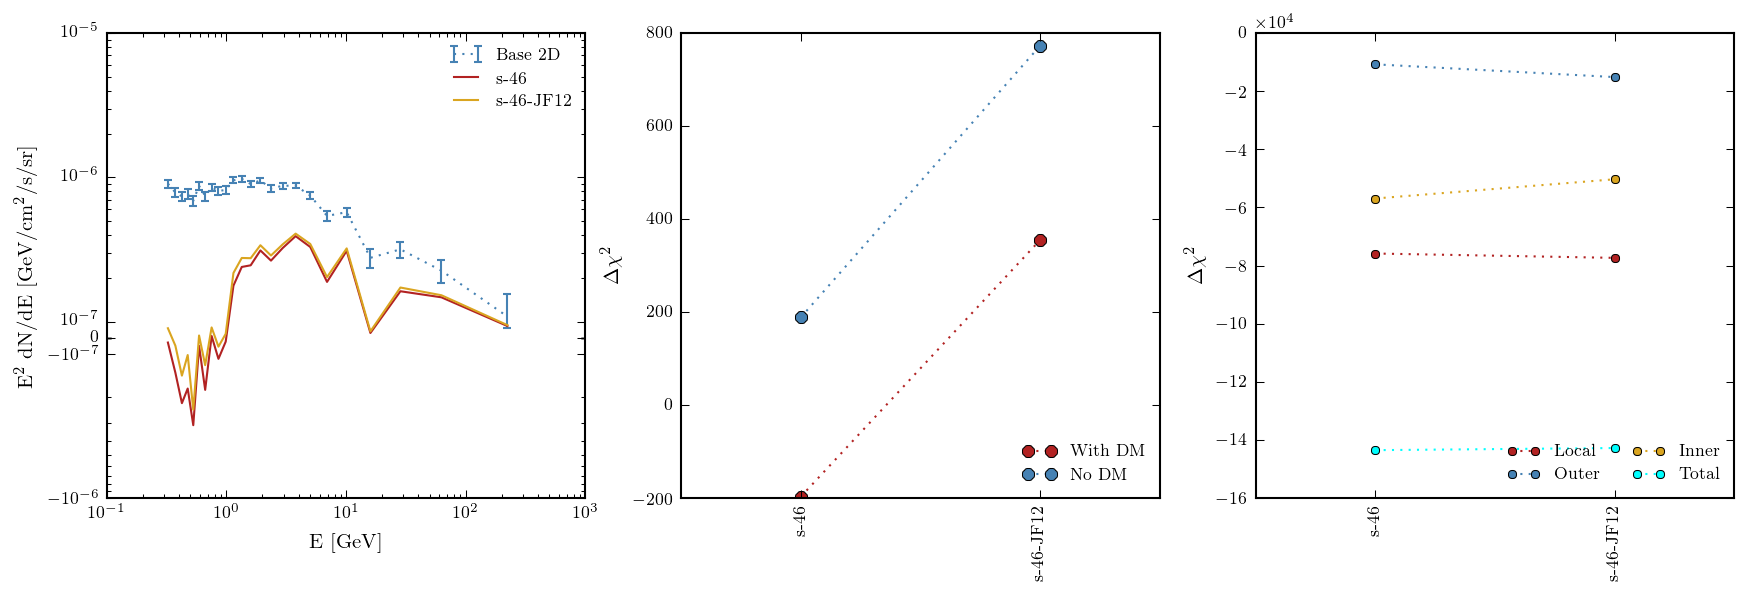

In [41]:
plt.figure(figsize=(14,4))
pathlist  = ['../new/iter1/mod_s_46_XCO_P8_stripped.hdf5','../new/mod_s_JF12_46_XCO_P8_stripped.hdf5']
labels =  [ 's-46', 's-46-JF12', ]#'B-MS04-R5','B-MS04-R10']
PlotModels(pathList=pathlist, text='',labels=labels, ylim=(None,None))
